# <center> <font color="red"> ML Project: Regression modelling on insurance dataset </font> </center>

### Importing required packages

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os 
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Loading the dataset

In [ ]:
DATA_PATH = os.path.abspath('./data')
try:
    insurance_raw_df = pd.read_csv(os.path.join(DATA_PATH,'insurance.csv'))
except:
    print('Couldn\'t open the dataset file')

### Exploring the dataset characteristics

In [ ]:
# Show the first 5 records from the dataset ...
insurance_raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# replace values that are entirely space (or empty) with NaN
insurance_raw_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Show the columns meta-data information ...
insurance_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### <font color="green">Note: the dataset has 1338 records and 7 columns in total. There are 4 numerical columns and 3 categorical columns. There is no missing values.</font>

In [ ]:
# Show statistical information for numerical columns ...
insurance_raw_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002871D68F1C8>,
      dtype=object)

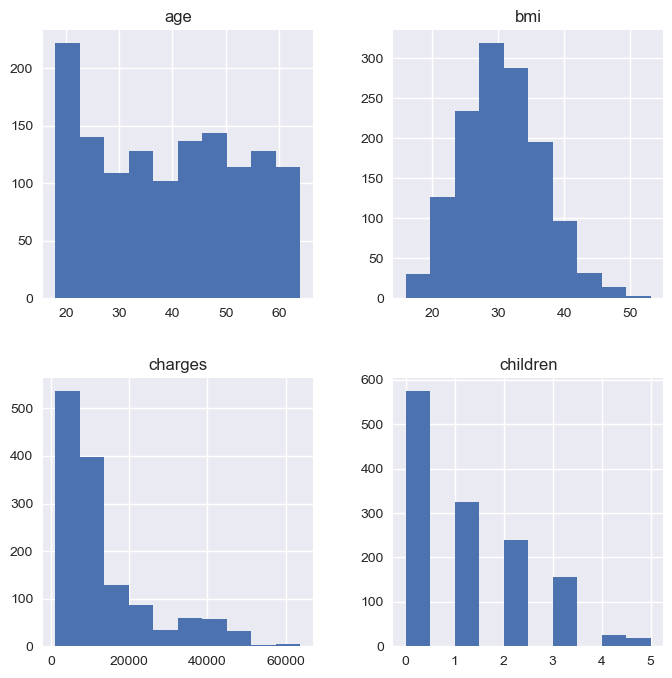

In [ ]:
# Show histograms of numerical columns to visualize their value distributions ...
plt.style.use('seaborn')
insurance_raw_df.hist(figsize=(8, 8))

Text(0.04, 0.5, 'Probability')

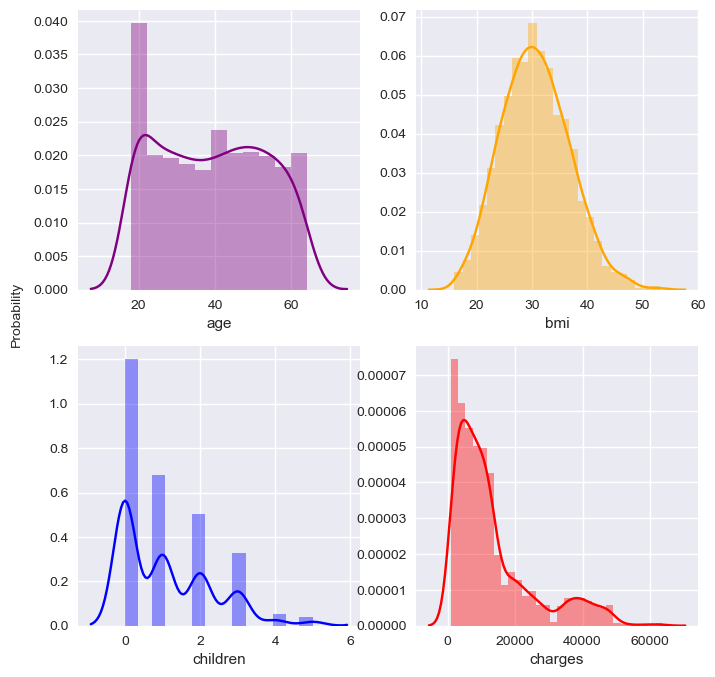

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
sns.distplot(insurance_raw_df['age'],ax=axes[0,0],color='purple')
sns.distplot(insurance_raw_df['bmi'],ax=axes[0,1],color='orange')
sns.distplot(insurance_raw_df['children'],ax=axes[1,0],color='blue')
sns.distplot(insurance_raw_df['charges'],ax=axes[1,1],color='red')
fig.text(0.04, 0.5, 'Probability', va='center', rotation='vertical')

<AxesSubplot:ylabel='charges'>

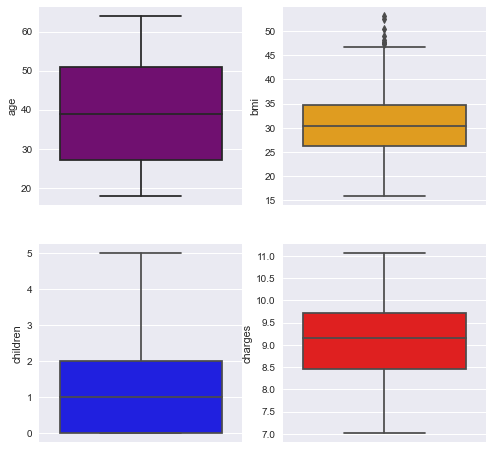

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
sns.boxplot(insurance_raw_df['age'],ax=axes[0,0],color='purple', orient='v')
sns.boxplot(insurance_raw_df['bmi'],ax=axes[0,1],color='orange', orient='v')
sns.boxplot(insurance_raw_df['children'],ax=axes[1,0],color='blue', orient='v')
sns.boxplot(np.log(insurance_raw_df['charges']),ax=axes[1,1],color='red', orient='v')


<AxesSubplot:xlabel='children', ylabel='charges'>

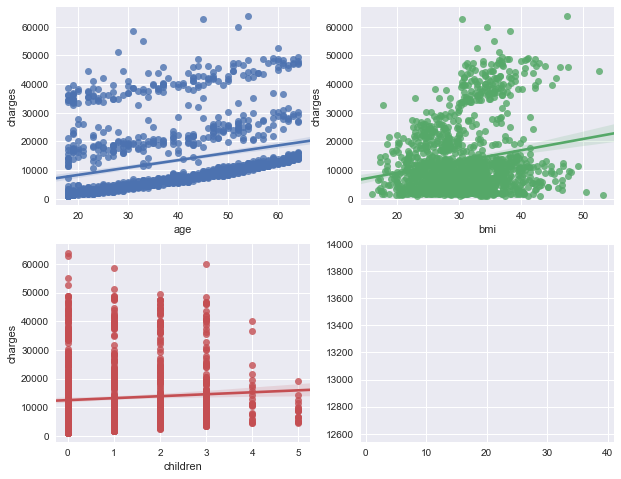

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.regplot(y=insurance_raw_df['charges'], x=insurance_raw_df['age'],ax=axes[0,0])
sns.regplot(y=insurance_raw_df['charges'], x=insurance_raw_df['bmi'],ax=axes[0,1])
sns.regplot(y=insurance_raw_df['charges'], x=insurance_raw_df['children'],ax=axes[1,0])


#### <font color="green">Notes:</br>
<ul>
    <li><font color="green">The age feature is almost evenly distributed with slightly more people in 20s and with average age of 39 years and 75% of them are 51 years old or younger.</font></li>
    <li><font color="green">The BMI feature is normally distributed with a mean value of 30 and a standard deviation equal to 6. Based on the BMI index, almost 50% of the population in the dataset falls in the obese category.</font></li>
    <li><font color="green">The majority of the population in this dataset does not have children with 75% of them with 2 children or less.</font></li>
    <li><font color="green">The charges target feature is skewed with 75% of the population is paying &#36;16,640 or less and 25% higher than this. </font></li>
</ul>
</font>

In [ ]:
# Show count plots for categorical columns ...
def showCategCountPlot(data,colname,huecol='',fig_w=8,fig_h=6):
    """ Plots a count graph for a categorical column in the data"""
    try:
        plt.figure(figsize=(fig_w,fig_h))
        if not huecol:
            ax = sns.countplot(x=colname, data=data)
        else:
            ax = sns.countplot(x=colname, hue=huecol, data=data)
            ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
        for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+4.5))
    except Exception as e:
        if hasattr(e, 'message'):
            print(e.message)
        else:
            print(e)

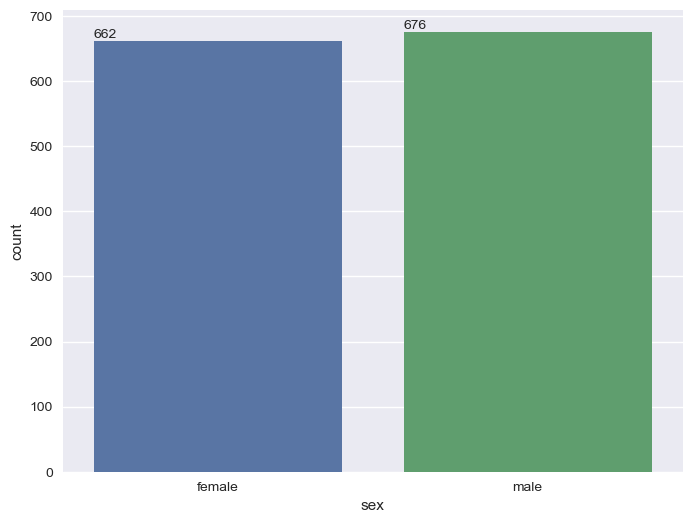

In [ ]:
showCategCountPlot(insurance_raw_df,'sex')

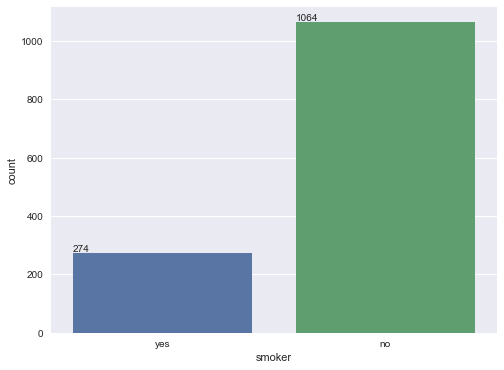

In [ ]:
showCategCountPlot(insurance_raw_df,'smoker')

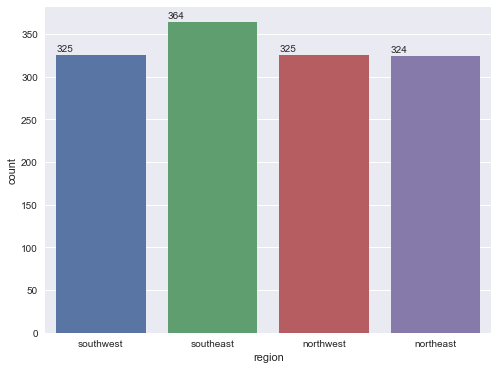

In [ ]:
showCategCountPlot(insurance_raw_df,'region')

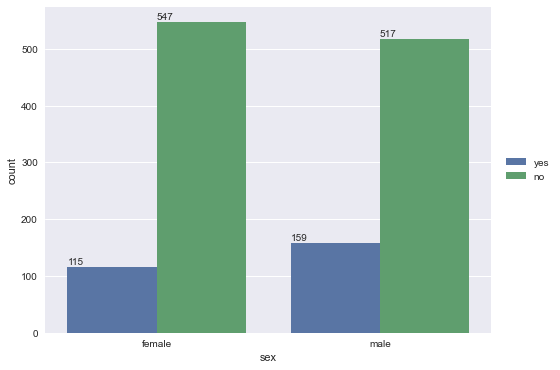

In [ ]:
showCategCountPlot(insurance_raw_df,'sex', 'smoker')

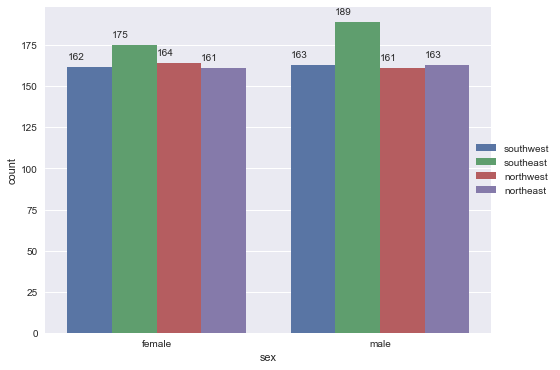

In [ ]:
showCategCountPlot(insurance_raw_df,'sex', 'region')

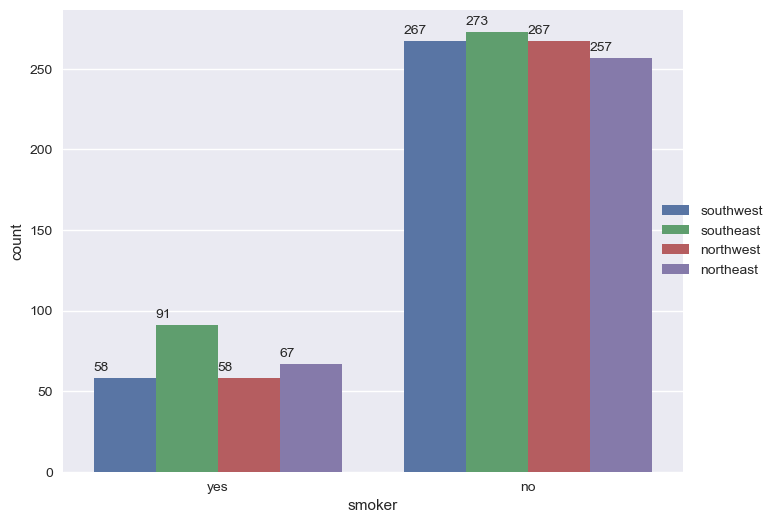

In [ ]:
showCategCountPlot(insurance_raw_df,'smoker', 'region')

#### <font color="green">Notes:</br>
<ul>
    <li><font color="green">The population in the dataset is almost evenly distributed across males and females with slightly higher percentage of males.</font></li>
    <li><font color="green">Almost 79% of the population falls in the "no smoker" category, while the percentages of smokers and no smokers are similar across males and females.</font></li>
    <li><font color="green">The population is evenly distributed across different regions.</font></li>
</ul>
</font>

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

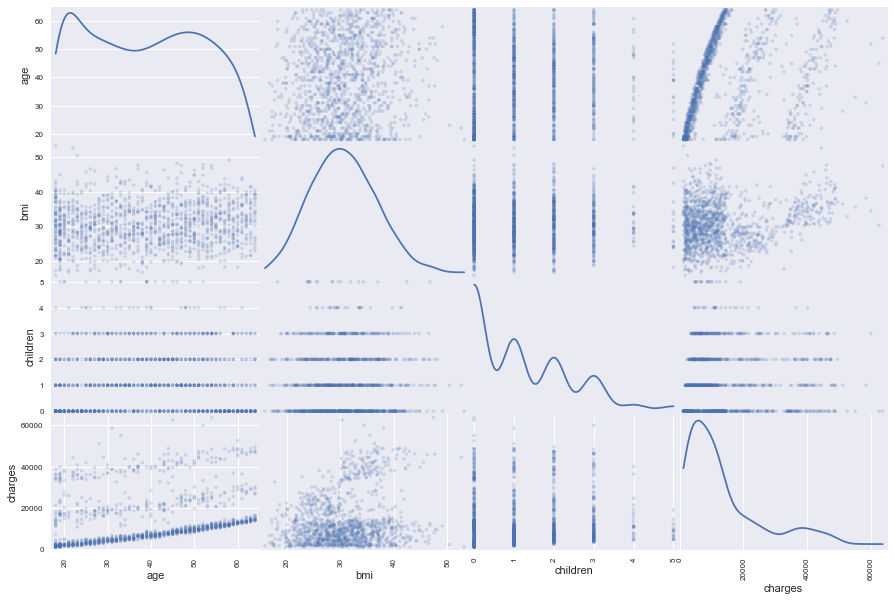

In [ ]:
# Show scatter matric for correlation visualization ...
from pandas.plotting import scatter_matrix
scatter_matrix(insurance_raw_df, alpha=0.2, figsize=(15, 10), diagonal="kde")

In [ ]:
# Show the real correlation values (from -1 t 1) across numerical columns ...
corr = insurance_raw_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1,0.109272,0.042469,0.299008
bmi,0.109272,1,0.0127589,0.198341
children,0.042469,0.0127589,1,0.0679982
charges,0.299008,0.198341,0.0679982,1


#### <font color="green">Notes:</br>
<ul>
    <li><font color="green">The age feature has the highest positive correlation to insurance charges.</font></li>
    <li><font color="green">The BMI feature is also positively correlated to insurance charges.</font></li>
    <li><font color="green">There is no significant correlation between number of children and insurance charges.</font></li>
</ul>
</font>

#### To show the distribution of charges across categorical columns, we use barplots as follows ...

<AxesSubplot:xlabel='sex', ylabel='charges'>

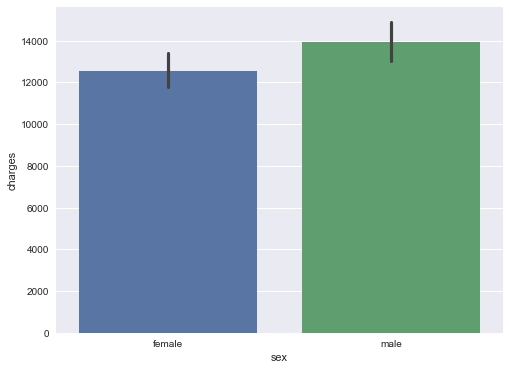

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="sex", y="charges", data=insurance_raw_df, ax=ax)

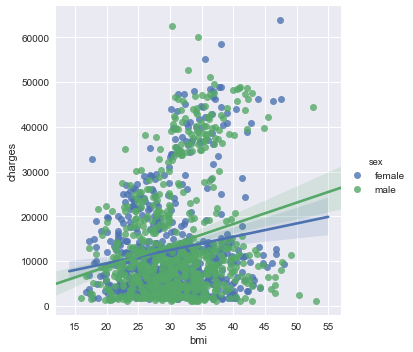

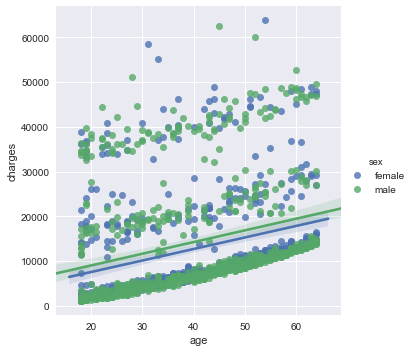

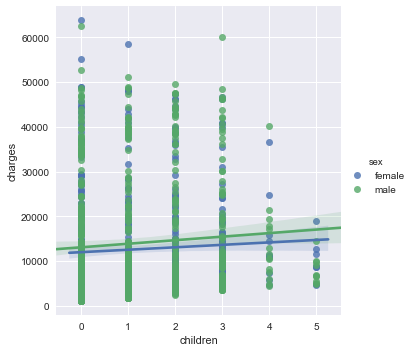

In [ ]:
sns.lmplot(data=insurance_raw_df,x='bmi',y='charges',hue='sex')
sns.lmplot(data=insurance_raw_df,x='age',y='charges',hue='sex')
sns.lmplot(data=insurance_raw_df,x='children',y='charges',hue='sex')

<AxesSubplot:xlabel='region', ylabel='charges'>

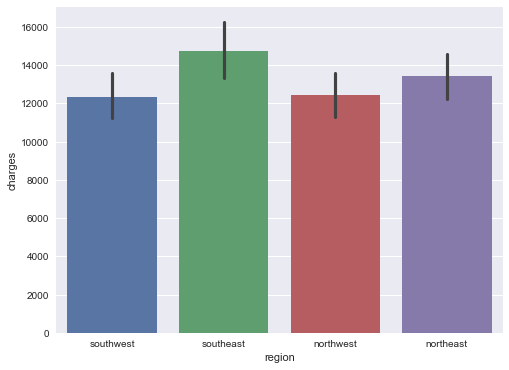

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="region", y="charges", data=insurance_raw_df, ax=ax)

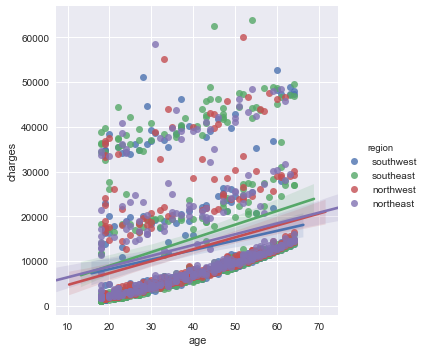

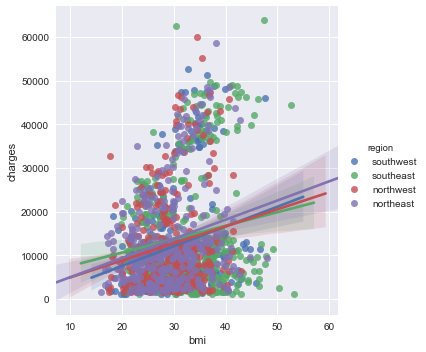

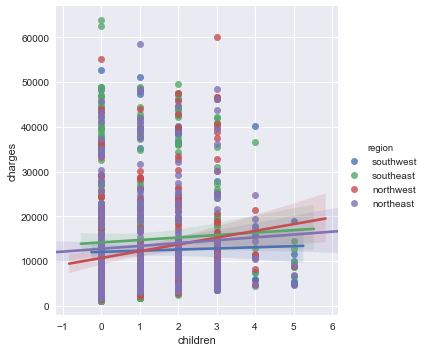

In [ ]:
sns.lmplot(data=insurance_raw_df,x='age',y='charges',hue='region')
sns.lmplot(data=insurance_raw_df,x='bmi',y='charges',hue='region')
sns.lmplot(data=insurance_raw_df,x='children',y='charges',hue='region')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

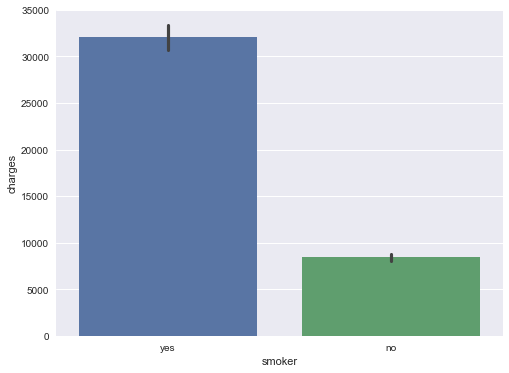

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="smoker", y="charges", data=insurance_raw_df, ax=ax)

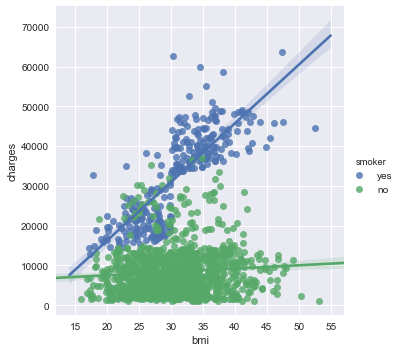

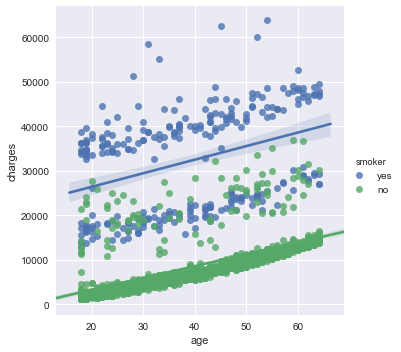

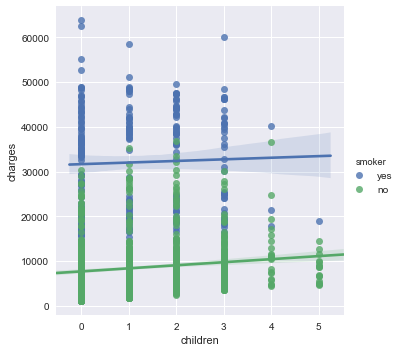

In [ ]:
sns.lmplot(data=insurance_raw_df,x='bmi',y='charges',hue='smoker')
sns.lmplot(data=insurance_raw_df,x='age',y='charges',hue='smoker')
sns.lmplot(data=insurance_raw_df,x='children',y='charges',hue='smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

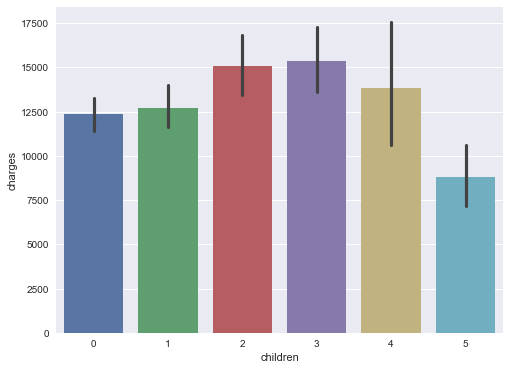

In [ ]:
# As children column has a small number of values, it is useful to visualize its relation to charges through a barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="children", y="charges", data=insurance_raw_df, ax=ax)

#### <font color="green">Notes:</br>
<ul>
    <li><font color="green">People who smoke tend to pay significanlty higher insurance charges on average.</font></li>
    <li><font color="green">People with 2 to 4 children tend to pay slightly higher insurance charges on average .</font></li>
</ul>
</font>

#### ***In summary of exploring the relationships between independent and dependent features, it seems that the {"age", "bmi", "smoker"} features are more important to determine the "charges" amount than other features.

### Pre-processing of features

In [ ]:
# Adding a new feature for BMI index ...

# bmi <= 18.5 then 'under weight'
# 18.5 < bmi < 25 then 'normal'
# 25 <= bmi < 30 then 'over weight'
# 30 <= bmi < 35 then 'obese'
# 35<= bmi then 'extremely obese'

insurance_processed_df = insurance_raw_df.copy()
insurance_processed_df['bmi_index'] = pd.cut(x=insurance_processed_df['bmi'], bins=[0, 18.5, 25, 30, 35, 55], labels=['under weight', 'normal', 'over weight', 'obese', 'extremely obese'])

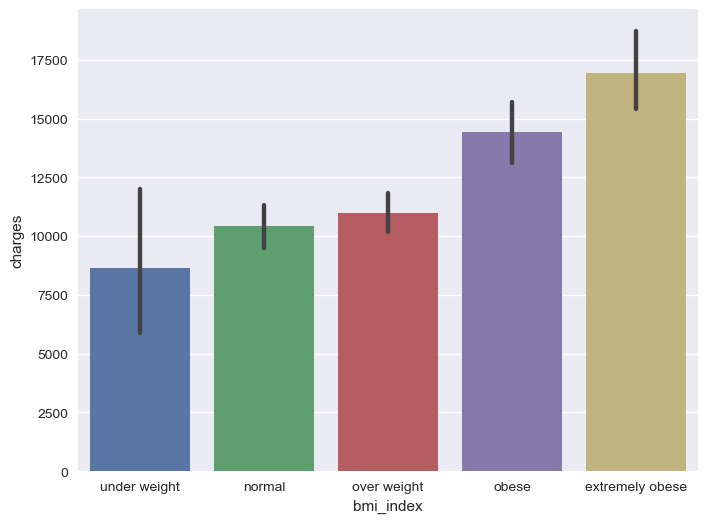

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="bmi_index", y="charges", data=insurance_processed_df, ax=ax)

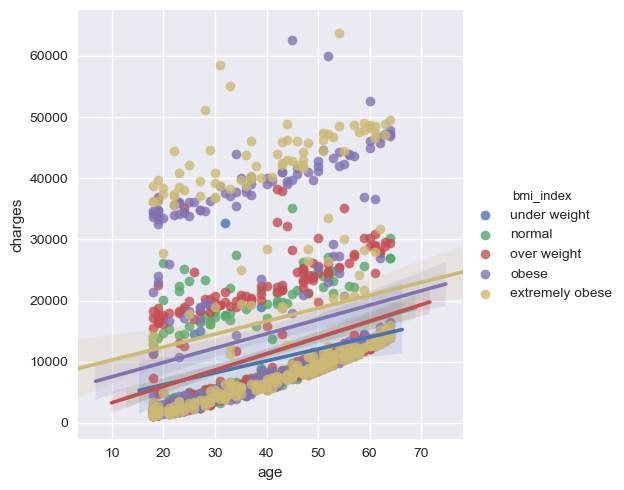

In [ ]:
sns.lmplot(data=insurance_processed_df,x='age',y='charges',hue='bmi_index')

In [ ]:
insurance_processed_df['log_bmi_age_chld'] = np.log((insurance_processed_df['bmi'] + insurance_processed_df['age'] + insurance_processed_df['children']))

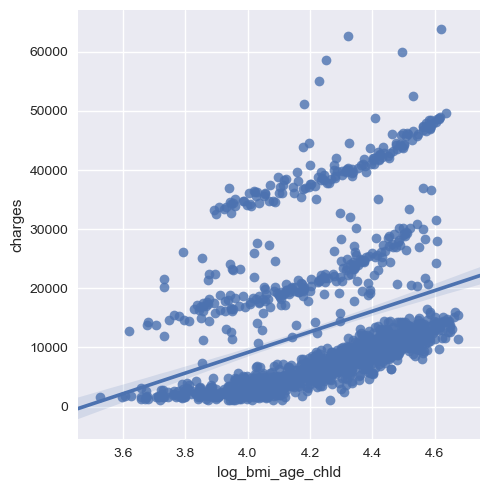

In [ ]:
sns.lmplot(data=insurance_processed_df,x='log_bmi_age_chld',y='charges')

In [ ]:
# Show the real correlation values (from -1 t 1) across numerical columns ...
corr = insurance_processed_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,log_bmi_age_chld
age,1,0.109272,0.042469,0.299008,0.912158
bmi,0.109272,1,0.0127589,0.198341,0.476761
children,0.042469,0.0127589,1,0.0679982,0.138757
charges,0.299008,0.198341,0.0679982,1,0.339286
log_bmi_age_chld,0.912158,0.476761,0.138757,0.339286,1


### Pre-processing pipeline execution

In [ ]:
np.random.seed(42)

numeric_features = ['age','log_bmi_age_chld','children']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_features = ['sex','smoker','region','bmi_index']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
data_matrix = preprocessor_pipeline.fit_transform(insurance_processed_df)
X_train, X_test, y_train, y_test = train_test_split(data_matrix, insurance_processed_df['charges'], test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(936, 16)

In [ ]:
y_train.shape

(936,)

In [ ]:
X_test.shape

(402, 16)

In [ ]:
y_test.shape

(402,)

### Regression Modelling

#### 1) Using a linear regression model

In [ ]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

grid_param = {}

gd_sr = GridSearchCV(estimator=lin_reg,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)
gd_sr.score(X_test,y_test)

-4242.603349481227

#### 2) Using a Ridge regression model (L2 regularization)

In [ ]:
ridge_reg = linear_model.Ridge(random_state=42)
grid_param = {
    'alpha': [0.5, 0.55, 0.6],
}
gd_sr = GridSearchCV(estimator=ridge_reg,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print(best_result)

{'alpha': 0.6}
-4343.867132344838


In [ ]:
gd_sr.score(X_test,y_test)

-4239.311916784277

#### 3) Using a Lasso regression model (L1 regularization)

In [ ]:
lasso_reg = linear_model.Lasso(random_state=42)
grid_param = {
    'alpha': [0.5, 0.55, 0.6],
}
gd_sr = GridSearchCV(estimator=lasso_reg,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print(best_result)

{'alpha': 0.6}
-4344.447306755377


In [ ]:
gd_sr.score(X_test,y_test)

-4241.298257110483

#### 4) Using Support Vector regression (SVR) model

In [ ]:
from sklearn.svm import SVR

grid_param = {
    'kernel': ['linear','poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4,5],
    'C':[0.3,0.5,0.75,1.0],
    'epsilon':[0.1,0.2,0.3,0.5],
    'shrinking':[True, False]
}

svr_reg = SVR()
gd_sr = GridSearchCV(estimator=svr_reg,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print('Best scroe on validation = '+ str(best_result))

In [ ]:
gd_sr.score(X_test,y_test)

-6301.7784548926375

#### 5) Using decision tree regression model


In [ ]:
from sklearn.tree import DecisionTreeRegressor

grid_param = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [5,7,10]
}

tree_reg = DecisionTreeRegressor(random_state=42)
gd_sr = GridSearchCV(estimator=tree_reg,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print('Best scroe on validation = '+ str(best_result))

{'max_depth': 5, 'min_samples_split': 5}
Best scroe on validation = -2906.755322110455


In [ ]:
gd_sr.score(X_test,y_test)

-2543.696620046367

#### 6) Using a k-nearest neighbors regression model (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh_regr = KNeighborsRegressor()
grid_param = {
    'n_neighbors': [3,5,10],
    'p': [1, 2],
    'weights': ['uniform','distance'],
    'algorithm': ['auto']
}
gd_sr = GridSearchCV(estimator=neigh_regr,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print('Best scroe on validation = '+ str(best_result))

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best scroe on validation = -4737.65788368444


In [ ]:
gd_sr.score(X_test,y_test)

-4181.155484482111

#### 7) Using Ada Boosting Decision Trees ensemble model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
gbdt_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), random_state=42)
grid_param = {
    'n_estimators': [50,100,150]
}
gd_sr = GridSearchCV(estimator=gbdt_regr,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print(best_result)
print('The score on test is: \n')
gd_sr.score(X_test,y_test)

{'n_estimators': 100}
-2370.6239031454525
The score on test is: 



-2296.208668096837

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_regr = GradientBoostingRegressor(random_state=42)
grid_param = {    
    'n_estimators': [150,170,190],
    'min_samples_split': [30,50],
    'learning_rate': [0.05,0.075],
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'max_depth': [7,10]
}

gd_sr = GridSearchCV(estimator=gbr_regr,
                     param_grid=grid_param,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
best_result = gd_sr.best_score_
print(best_parameters)
print(best_result)
print('The score on test is:')
gd_sr.score(X_test,y_test)

{'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 170}
-2001.448688368358
The score on test is:


-1743.0183751854931

In [ ]:
y_test[:5].to_list()

[9095.06825, 5272.1758, 29330.98315, 9301.89355, 33750.2918]

In [ ]:
gd_sr.best_estimator_.predict(X_test[:5])

array([ 8721.50687902,  5237.06047055, 28702.61605013,  8730.79821094,
       34103.91905082])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, polyreg.predict(X_test), multioutput='raw_values')

array([2415.48955155])